# Deskripsi projek

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.
󠀰Untuk mengurangi tingkat churn, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Adapun tujuan projek ini adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention).󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳
langkah-langkah yang dilakukan yaitu:
1. Memuat library yang dibutuhkan
2. Memuat datanya
3. Melakukan Analisis Data Eksploratif (EDA)
4. Membangun Model untuk Memprediksi Churn Pengguna
5. Membuat Klaster Pengguna
7. Kesimpulan dan Rekomendasi Sederhana untuk Bekerja dengan Pelanggan

# Memuat Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

In [2]:
# fungsi untuk visualisasi data

def feat_hist (x, group_col, key_cols):
    x_new = x.copy ()
    x_new[key_cols] = df [key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new [group_col]==cl][c],
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

# Memuat data

In [3]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0


In [4]:
 df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [5]:
df.shape

(4000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [8]:
df.shape

(4000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Tidak ada missing value, artinya tidak ada vitur yang hilang, semua data dalam bentuk integer dan float

# Analisis Data Eksploratif (EDA)

In [10]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


nilai standar deviasi rata-rata nilainya dibawah 10, tetapi pada kolom Avg_additional_charges_total nilainya 96.4, artinya terdapat perbedaan skala yang cukup besar, hal ini akan mempengaruhi pada saat clustering, oleh karna itu perlu lakukan standarisasi.

In [11]:
# mengelompokan berdasarakan churn-nya
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611899,5.283089486219803,4.711806736985369,2.024875642518554,2.027881733095179
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287263,1.662582469368520,0.990574929311970,1.474994662372977,1.044545593398017


0=tidak churn
1=churn.
perbedaan rata-rata antara churn dan tidak churn pada kolom gender tidak terlalu berbeda artinya gender tidak mempengaruhi pelanggan churn atau tidak, 
pada kolom partner menunjukan nilai yang churn lebih rendah dibandingkan yang tidak churn artinya karyawan perusahaan yang bermitra dengan tempat GYM ini banyak yang terus berlanggana, begitu pula pada kolom promo_friends, dan Group_visit, pelanggan yang tidak churn nilai rata-ratanya lebiih besar dari pada yang churn, artinya jika pelanggan yang datang bersama-sama dan pelanggan yang memiliki diskon lebih banyak yang bertahan untuk terus berlangganan.

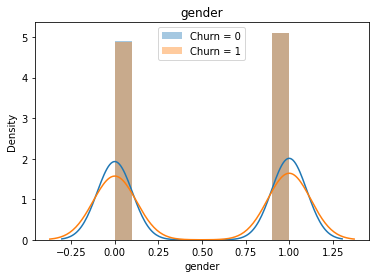

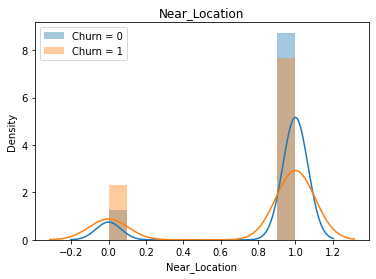

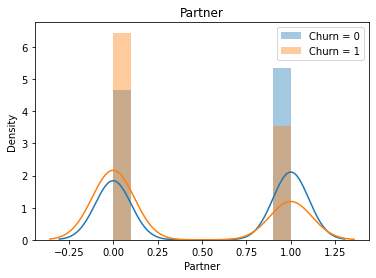

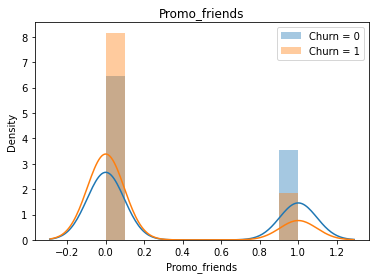

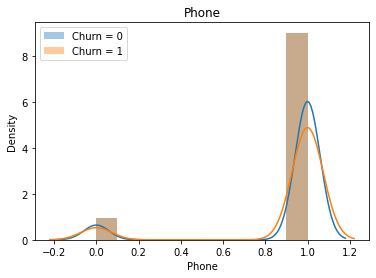

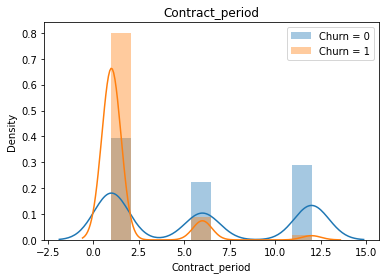

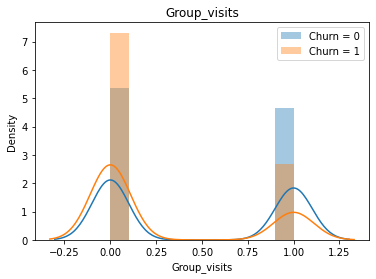

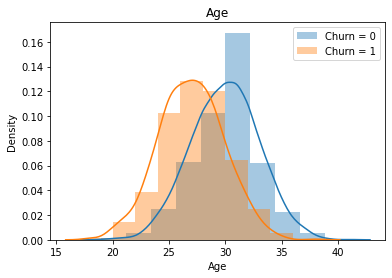

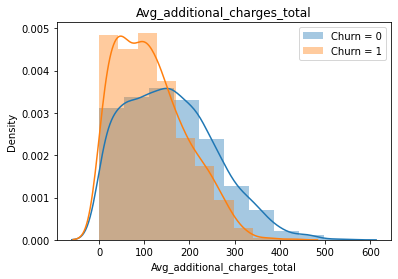

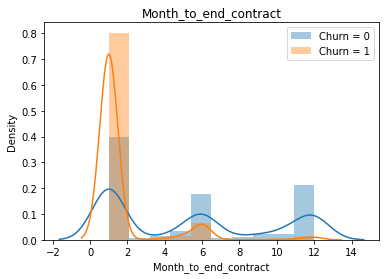

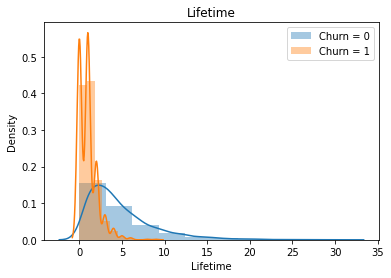

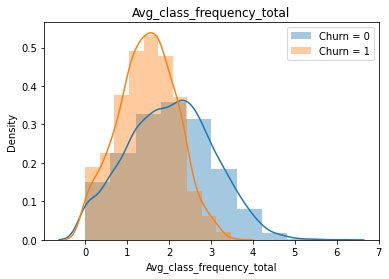

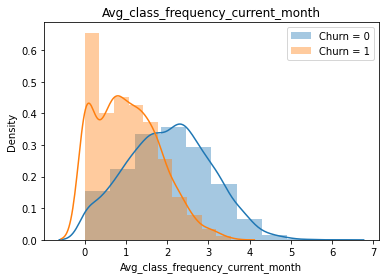

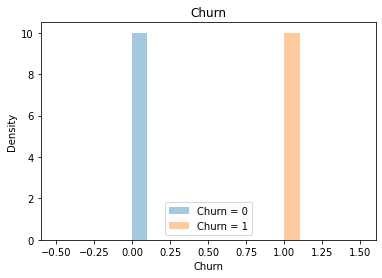

In [12]:
feat_hist(df, 'Churn', df.columns)

pada grafik gender tidak ada perbedaan signifikan.
pada grafik Near_location yang tidak churn lebih banyak yang lokasinya dekat dengan tempat gym, artinya banyak orang cenderung lebih sering datang ke gym jika lokasinya lebih dekat.
pada grafik partner distribusi pelanggan yang tidak churn nilainya lebih banyak dibandingkan yang churn artinya karyawan perusahaan yang bermitra dengan tempat GYM ini banyak yang terus berlangganan.
pada grafik promo_friend pelanggan yang daftar menggunakan promo_friend atau kode diskon teman lebih banyak yang tidak churn dibandigkan yang churn.
Begitu pun pada grafik group_visits pelanggan mengambil bagian dalam sesi kelompok lebih banyak yang tidak churn dari pada yang churn artinya jika datang ke tempat gym bersama teman-teman lebih cenderung sering datang ke tempat gym dibandingkan yang datang sendiri.

In [13]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000000000000,0.006699227595081,-0.010462622250800,-0.005033272441054,-0.008542118064000,0.000502261220279,0.017878940218984,0.013806900920360,-0.009334436022097,-0.001280790522073,0.013578571154470,0.014620159193698,0.009156488375539,0.000707733985153
Near_Location,0.006699227595081,1.000000000000000,-0.005119431260763,0.210964279250089,-0.015763230257229,0.150232831416567,0.154728047973810,0.058357839446367,0.040761205686103,0.143960652863483,0.070920564055164,0.043127478605891,0.062663633458793,-0.128097990299810
Partner,-0.010462622250800,-0.005119431260763,1.000000000000000,0.451959803638693,0.009969610205313,0.306166251238889,0.022709566916954,0.047479698759628,0.022941185300935,0.294632124877685,0.061229353260985,0.024937869800103,0.045561091361999,-0.157985736985098
Promo_friends,-0.005033272441054,0.210964279250089,0.451959803638693,1.000000000000000,0.001981592231935,0.244551568070672,0.120169506269850,0.050113307413902,0.036897676000240,0.239553224750288,0.072721100932983,0.028063220773726,0.053768377063076,-0.162233077833515
Phone,-0.008542118064000,-0.015763230257229,0.009969610205313,0.001981592231935,1.000000000000000,-0.006893264000346,-0.010099146860770,-0.011403238953259,0.009279431489794,-0.011196256833938,-0.018801227382775,0.008340465501805,0.013374852916164,-0.001176601362480
Contract_period,0.000502261220279,0.150232831416567,0.306166251238889,0.244551568070672,-0.006893264000346,1.000000000000000,0.169990834019106,0.138249289429536,0.111445063341492,0.973063587268638,0.170725270972972,0.096211136398092,0.159407376566591,-0.389984211586078
Group_visits,0.017878940218984,0.154728047973810,0.022709566916954,0.120169506269850,-0.010099146860770,0.169990834019106,1.000000000000000,0.080933568901738,0.032079086460016,0.163702563158596,0.075852846038239,0.056694752430919,0.075923274727096,-0.175324655498149
Age,0.013806900920360,0.058357839446367,0.047479698759628,0.050113307413902,-0.011403238953259,0.138249289429536,0.080933568901738,1.000000000000000,0.080240125272997,0.134511341398497,0.164692820019427,0.119953132113990,0.183094542154536,-0.404735252823589
Avg_additional_charges_total,-0.009334436022097,0.040761205686103,0.022941185300935,0.036897676000240,0.009279431489794,0.111445063341492,0.032079086460016,0.080240125272997,1.000000000000000,0.113958039016871,0.079028338696600,0.044426412947373,0.079569677409450,-0.198697451068203
Month_to_end_contract,-0.001280790522073,0.143960652863483,0.294632124877685,0.239553224750288,-0.011196256833938,0.973063587268638,0.163702563158596,0.134511341398497,0.113958039016871,1.000000000000000,0.161077551415275,0.085386674018559,0.147605112323244,-0.381392983695714


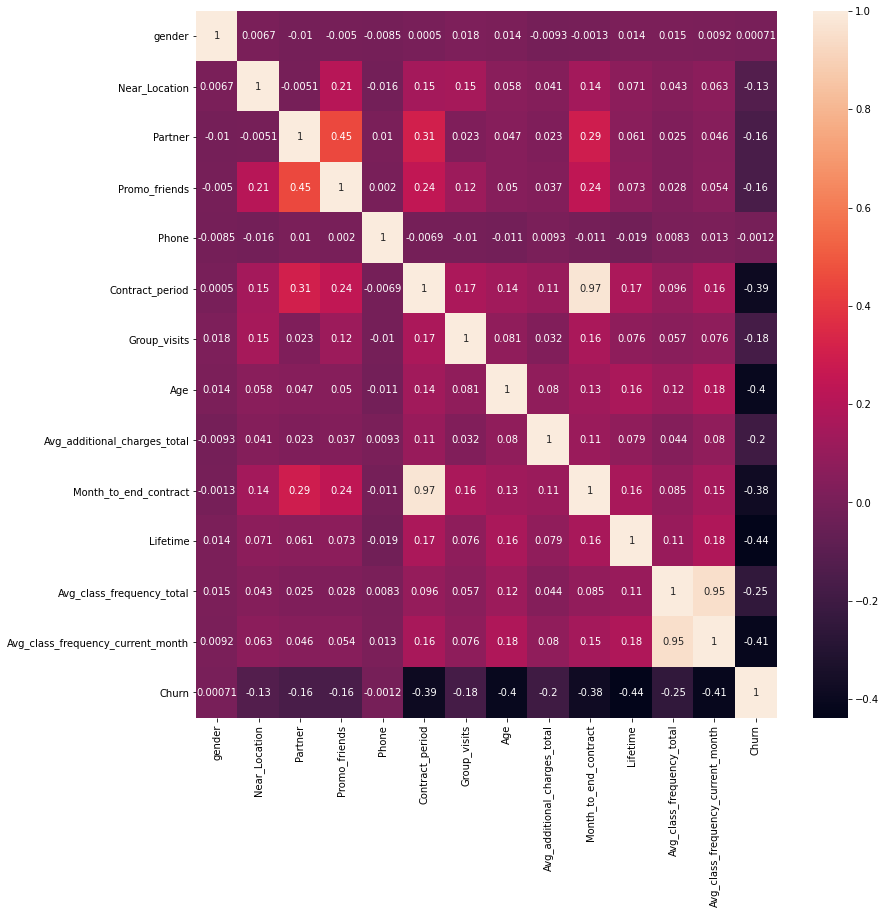

In [14]:
plt.figure(figsize = (13, 13))
sns.heatmap(df.corr(), annot= True)
plt.show()

Grafik heatmap menunjukan nilai kolerasi antar tabel, semakin positif nilainya apalagi mendekati 1 maka korelasinya besar, jika nilai kolerasinya minus berarti tidak ada kolerasi atar tabel tersebut

# Membangun Model untuk Memprediksi Churn Pengguna

In [15]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(columns = ['Churn']), df['Churn'], test_size = 0.2, random_state=42)

Logiistic Regression model:

In [16]:
lr_model = LogisticRegression(random_state=42)

In [17]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)

In [19]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regresion is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistis regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Accuracy score for logistic regression is: 0.91
Precision score for logistic regresion is: 0.86
Recall score for logistis regression is: 0.77


Random forest model:

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 

In [21]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_proba_rf = rf_model.predict_proba(X_val)
y_pred_rf = rf_model.predict(X_val)

In [23]:
print('Accuracy score for Random forest is: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Precision score for Random forest is: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('Recall score for Random forest is: {:.2f}'.format(recall_score(y_val, y_pred_rf)))

Accuracy score for Random forest is: 0.91
Precision score for Random forest is: 0.85
Recall score for Random forest is: 0.78


nilai akurasi, presisi dan recall cukup tinggi yang menunjukkan prediksi yang akurat dari Logiistic Regression dan Random forest model, dan kedua model dapat dibilang score validationnya hampir sama, tidak jauh berbeda, artinya kedua model sama-sama memberikan hasil yang baik

# Membuat Klaster Pengguna

In [24]:
# Menstandarisasi data
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns = ['Churn']))

In [25]:
linked = linkage(x_sc, method = 'ward')

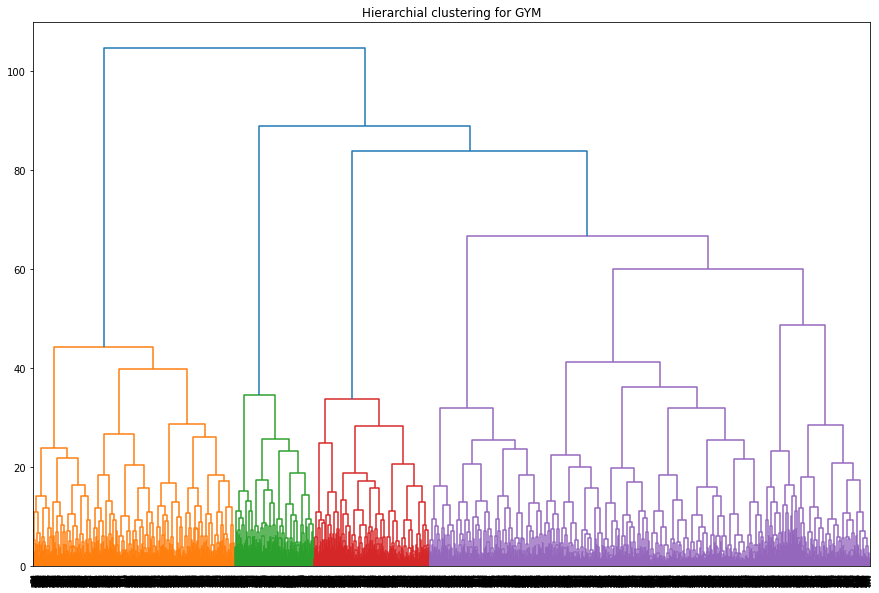

In [26]:
plt.figure(figsize=(15, 10))
dendrogram(linked,
          orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

In [27]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df.drop(columns = ['Churn']))

In [28]:
df['cluster_km'] = labels

In [29]:
df.groupby(['cluster_km']).count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,706,706,706,706,706,706,706,706,706,706,706,706,706,706
1,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
2,963,963,963,963,963,963,963,963,963,963,963,963,963,963
3,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
4,271,271,271,271,271,271,271,271,271,271,271,271,271,271


In [30]:
df.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.521246458923513,0.881019830028329,0.511331444759207,0.347025495750708,0.898016997167139,5.400849858356940,0.433427762039660,29.344192634560905,250.984766730779967,5.001416430594901,4.169971671388102,1.903480218190926,1.843255315387595,0.178470254957507
1,0.515533980582524,0.838834951456311,0.452427184466019,0.279611650485437,0.897087378640777,4.308737864077670,0.405825242718447,28.971844660194176,105.830934712772176,4.003883495145631,3.556310679611650,1.853561205289479,1.709489977601758,0.333980582524272
2,0.510903426791277,0.844236760124611,0.495327102803738,0.319833852544133,0.902388369678089,4.751817237798546,0.423676012461059,29.402907580477674,174.837664099230835,4.372793354101765,3.748701973001038,1.894099775103507,1.784568079403904,0.226375908618899
3,0.507766990291262,0.825242718446602,0.488349514563107,0.294174757281553,0.908737864077670,4.194174757281553,0.388349514563107,28.908737864077668,35.532545101124555,3.850485436893204,3.382524271844660,1.836714844046796,1.692245424529797,0.350485436893204
4,0.468634686346863,0.856088560885609,0.516605166051661,0.332103321033210,0.926199261992620,5.822878228782288,0.431734317343173,29.845018450184501,356.481960107734210,5.383763837638377,4.420664206642066,2.019259785446184,2.009381958807865,0.044280442804428


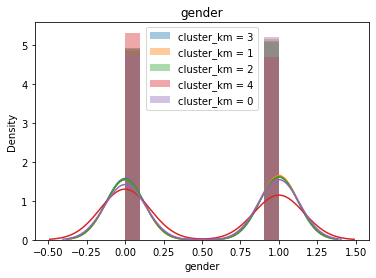

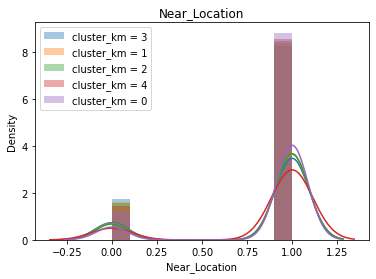

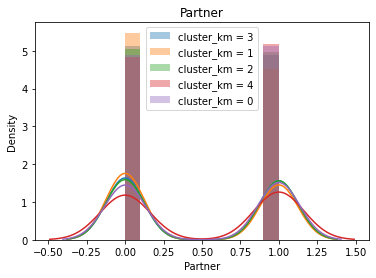

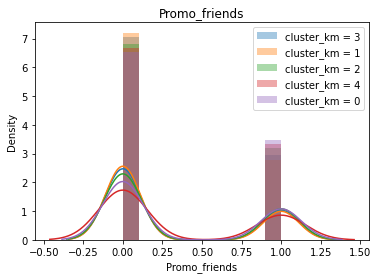

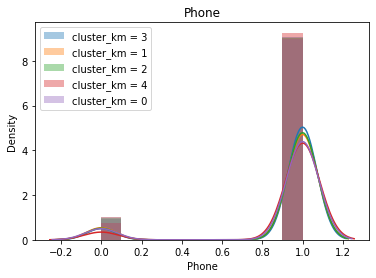

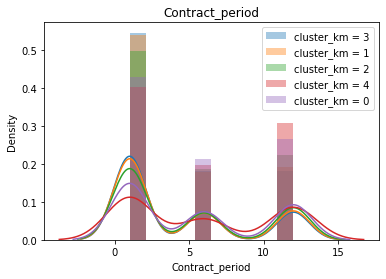

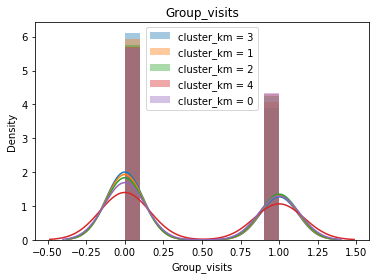

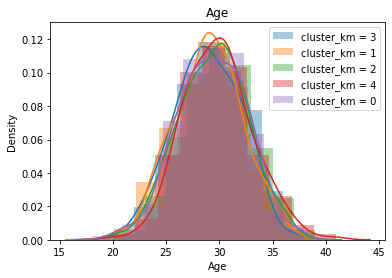

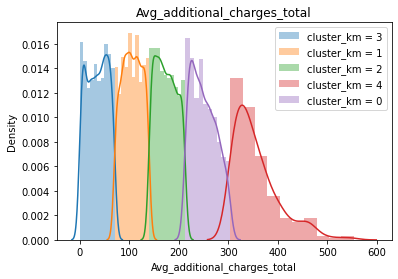

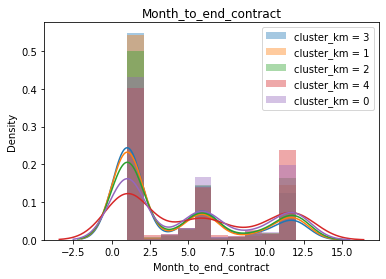

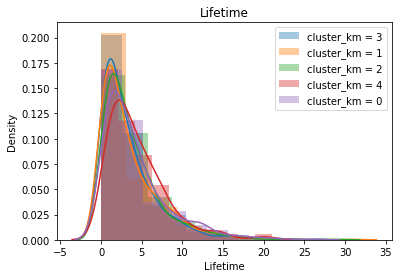

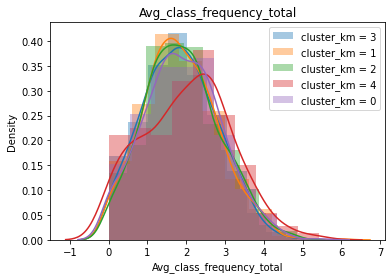

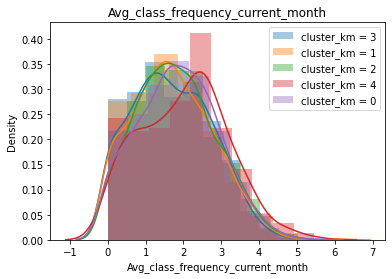

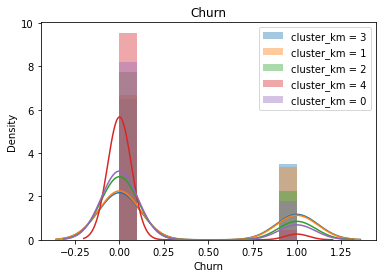

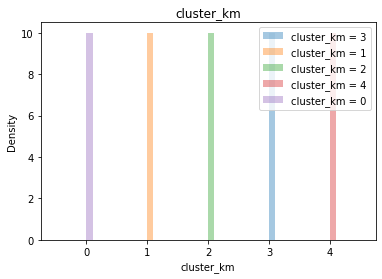

In [31]:
feat_hist(df, 'cluster_km', df.columns)

Avg_additional_charges_total pada klaster 3 lebih besar, artinya klaster 3 lebih banyak mengeluarkan uang untuk menggunakan additional charges atau layanan dari tempat gym seperti kafe, barang atletik, susu protein dan lain-lain. sedangkan additional charges di klaster 1 yang paling sedikit. 

In [32]:
df.groupby(['cluster_km']).mean()['Churn']

cluster_km
0    0.178470254957507
1    0.333980582524272
2    0.226375908618899
3    0.350485436893204
4    0.044280442804428
Name: Churn, dtype: float64

berdasarkan hasil rata-rata diatas, klaster 3 paling sedikit kecenderungannya untuk melakukan churn.

# Kesimpulan dan Rekomendasi Sederhana untuk Bekerja dengan Pelanggan

Berdasarkan hasil analisis data dari pusat kebugaran 'Model Fitness', gender tidak mempengaruhi pelanggan churn atau tidak, pada kolom partner menunjukan nilai yang churn lebih rendah dibandingkan yang tidak churn artinya karyawan perusahaan yang bermitra dengan tempat GYM ini banyak yang terus berlanggana, begitu pula pada kolom promo_friends, dan Group_visit, pelanggan yang tidak churn nilai rata-ratanya lebih besar dari pada yang churn, artinya jika pelanggan yang datang bersama-sama dan pelanggan yang memiliki diskon lebih banyak yang bertahan untuk terus berlangganan.

Maka dapat disimpulkan bahwa faktor yang paling memengaruhi churn yaitu jika pelanggan datang sendiri, tidak mendapatkan promo diskon, dan tempat gym jauh dari tempat tinggal. Mungkin pelayanan pelanggan dapat ditingkatkan dengan cara memberikan promo kepada pelanggan, karena dilihat dari pelanggan yang tidak churn yaitu pelanggan yang banyak mendapatkan diskon atau promo.